In [31]:
import rdkit
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem

In [11]:
with open('new_with_smote_corrected.txt') as f:
    content = f.readlines()

In [19]:
i = 0
with_errors = []
corrected = []

for row in content:
    row = row.strip()
    if row:
        smile = row.split()[-1]
        i += 1
        
        if i % 2 == 0:  # even => corrected
            corrected.append(smile)
        else:  # odd => with_errors
            with_errors.append(smile)

In [20]:
# check sizes
print(len(corrected))
print(len(with_errors))

351
351


In [21]:
smiles_df = pd.DataFrame({
    'with_errors' : with_errors,
    'corrected' : corrected
})

In [27]:
smiles_df['corrected_mol'] = smiles_df['corrected'].apply(Chem.MolFromSmiles)

In [32]:
smiles_df['charges'] = smiles_df['corrected_mol'].apply(AllChem.ComputeGasteigerCharges)

In [33]:
smiles_df.head()

with_errors  \
0                            Cc1cccc(c1)Oc2cccccc21C   
1                         N0CCNc1nc(Cl)nc(n1)N(CC)CC   
2                                   c1ccccc1c2cccc12   
3  C1=C2CCC=C)CCC(C44C)CC(C3C2(C)CCC1=O)=O)(C(CO)...   
4                               OC-c1ccccc1)c1ccccc1   

                                           corrected  \
0                            Cc1cccc(c1)-c1ccccccc1C   
1                          NNCCCc1nc(N)nc(n1)N(CC)CC   
2                                 Brc1cccccc2ccccc12   
3  C=C1C2C(C1C=CC(CCCC(C(C)C(C)C(C)C)CCCC2O)CCC)(...   
4                               OC(c1ccccc1)c1ccccc1   

                                      corrected_mol charges  
0  <rdkit.Chem.rdchem.Mol object at 0x7f6783f4d530>    None  
1  <rdkit.Chem.rdchem.Mol object at 0x7f6783f4d3f0>    None  
2  <rdkit.Chem.rdchem.Mol object at 0x7f6783f4d490>    None  
3  <rdkit.Chem.rdchem.Mol object at 0x7f6783f4d350>    None  
4  <rdkit.Chem.rdchem.Mol object at 0x7f6783f4d9e0>    None

In [36]:
m = Chem.MolFromSmiles(corrected[0])
AllChem.ComputeGasteigerCharges(m)
print(float(m.GetAtomWithIdx(0).GetProp('_GasteigerCharge')))

-0.03975253225191717


In [42]:
print(corrected[0])

Cc1cccc(c1)-c1ccccccc1C


In [45]:
m = Chem.MolFromSmiles(corrected[0])
m2 = Chem.AddHs(m)
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print(len(cids))
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print(len(rmslist))
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)

res = AllChem.MMFFOptimizeMoleculeConfs(m2)

10
9


In [46]:
print(res)

[(0, 59.875011259964104), (0, 59.886519540210685), (0, 59.88541701969979), (0, 59.885417041496126), (0, 59.88412658324205), (0, 59.884126576246416), (0, 59.87501018508644), (0, 59.88412657387314), (0, 59.8750101701463), (0, 59.88412736191853)]


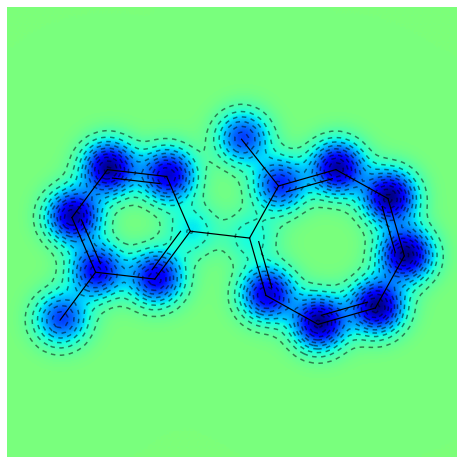

In [51]:
from rdkit.Chem.Draw import SimilarityMaps

mol = Chem.MolFromSmiles(corrected[0])
AllChem.ComputeGasteigerCharges(mol)
contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

In [53]:
print(contribs)
print(sum(contribs))

[-0.03975253225191717, -0.050516205989108096, -0.0592831533536102, -0.06138693178503869, -0.0543535947211734, -0.017874044410016256, -0.051432400703664276, -0.015463722657309723, -0.05411613396926187, -0.06164140083086036, -0.0622466540539979, -0.0622581256325513, -0.06198319504637661, -0.05870768967040811, -0.04327549718189636, -0.03915753534923363]
-0.7934488176064239


In [43]:
print(corrected[1])

NNCCCc1nc(N)nc(n1)N(CC)CC


In [50]:
m = Chem.MolFromSmiles(corrected[1])
m2 = Chem.AddHs(m)
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print(len(cids))
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print(len(rmslist))
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)
res = AllChem.MMFFOptimizeMoleculeConfs(m2)

print(res)

10
9
[(1, -169.38871680786062), (1, -171.8676250290544), (0, -171.1108826870549), (1, -172.69583996080175), (0, -171.1715589341264), (1, -169.73984469550484), (1, -173.03705594029262), (0, -172.54468113301925), (1, -173.1579997635557), (0, -170.5115374671446)]


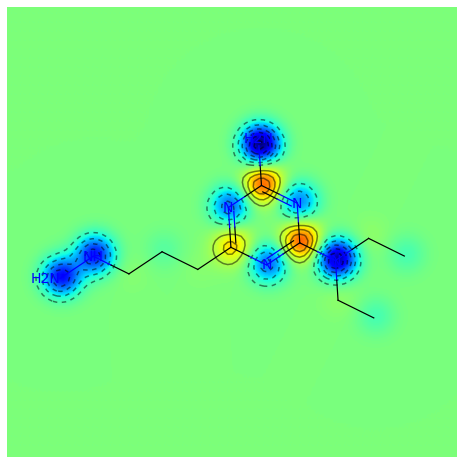

In [41]:
mol = Chem.MolFromSmiles(corrected[1])
AllChem.ComputeGasteigerCharges(mol)
contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

In [47]:
print(contribs)

[-0.2714622669403739, -0.2605099930981526, 0.010167312725442464, -0.032146040664098284, 0.008999347372861427, 0.13595349784379107, -0.1979269564589722, 0.22457504646331422, -0.3676369720321861, -0.17694999103032474, 0.22987695403842373, -0.1975658255801721, -0.3412303356093618, 0.017818778647366466, -0.047421023745422536, 0.017818778647366466, -0.047421023745422536]


In [48]:
total_charge = 0

for c in contribs:
    total_charge += c
    
print(total_charge)

-1.2950607131659209
